# Preprocessing

In [15]:
import os
import tensorflow as tf

# Define directories
base_dir = './Dataset2/'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=128,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Flow training images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        val_dir,  # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=32,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 43349 images belonging to 41 classes.
Found 9015 images belonging to 41 classes.
Found 8831 images belonging to 41 classes.


In [17]:
# Assign batch size and steps per epoch

num_samples = train_generator.n

BS = 500

steps_per_epoch = num_samples//BS

steps_per_epoch

86

# Modeling

In [4]:
# Using InceptionV3 as base model in transfer learning

from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model
from tensorflow.keras import layers

pre_trained_model = InceptionV3(weights='imagenet', include_top=False,
                               input_shape=(224,224,3))

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False
print(pre_trained_model.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [5]:
from tensorflow.keras import Model

# Add a global spatial average pooling layer
x = pre_trained_model.output
x = layers.GlobalAveragePooling2D()(x)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for classification
x = layers.Dense(41, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [6]:
#Compile the model with adam optimizer and a decaying learning rate

import keras
from keras.optimizers import Adam

learning_rate = 0.001
epoch = 45

opt = Adam(learning_rate=learning_rate, decay=learning_rate / epoch)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"]) 

# Training

In [7]:
# Assign a checkpoint callback to save the best model

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

history = model.fit(train_generator,
                    epochs=epoch,
                    batch_size=BS,
                    validation_data = validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint])

Epoch 1/45
82/82 [==============================] - ETA: 0s - loss: 1.7040 - accuracy: 0.5385
Epoch 1: val_loss improved from inf to 0.88442, saving model to model.h5
82/82 [==============================] - 1079s 13s/step - loss: 1.7040 - accuracy: 0.5385 - val_loss: 0.8844 - val_accuracy: 0.7392
Epoch 2/45
82/82 [==============================] - ETA: 0s - loss: 0.8773 - accuracy: 0.7299
Epoch 2: val_loss improved from 0.88442 to 0.68360, saving model to model.h5
82/82 [==============================] - 978s 12s/step - loss: 0.8773 - accuracy: 0.7299 - val_loss: 0.6836 - val_accuracy: 0.7863
Epoch 3/45
82/82 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.7843
Epoch 3: val_loss improved from 0.68360 to 0.58243, saving model to model.h5
82/82 [==============================] - 973s 12s/step - loss: 0.6813 - accuracy: 0.7843 - val_loss: 0.5824 - val_accuracy: 0.8140
Epoch 4/45
82/82 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.8007
Epo

Epoch 30/45
82/82 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8876
Epoch 30: val_loss did not improve from 0.31241
82/82 [==============================] - 1173s 14s/step - loss: 0.3267 - accuracy: 0.8876 - val_loss: 0.3287 - val_accuracy: 0.8889
Epoch 31/45
82/82 [==============================] - ETA: 0s - loss: 0.3198 - accuracy: 0.8879
Epoch 31: val_loss did not improve from 0.31241
82/82 [==============================] - 1115s 14s/step - loss: 0.3198 - accuracy: 0.8879 - val_loss: 0.3206 - val_accuracy: 0.8944
Epoch 32/45
82/82 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8917
Epoch 32: val_loss improved from 0.31241 to 0.29256, saving model to model.h5
82/82 [==============================] - 1129s 14s/step - loss: 0.3179 - accuracy: 0.8917 - val_loss: 0.2926 - val_accuracy: 0.9024
Epoch 33/45
82/82 [==============================] - ETA: 0s - loss: 0.3211 - accuracy: 0.8941
Epoch 33: val_loss did not improve from 0.29256
82

# Evaluation

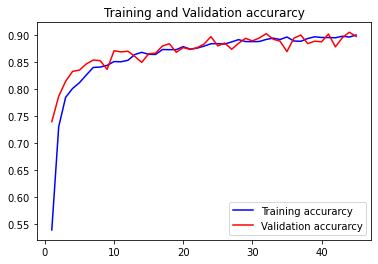

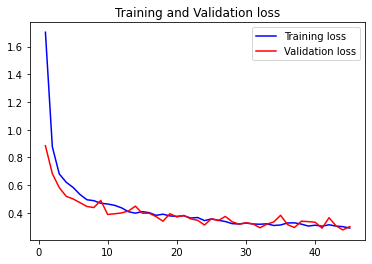

In [9]:
# Check the accuracy and loss graph


import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [10]:
#Evaluate the model

print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
276/276 [==============================] - 444s 2s/step - loss: 0.3075 - accuracy: 0.8998
Test Accuracy: 89.97848629951477


# Prediction Testing

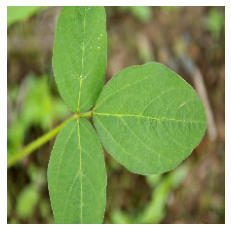

In [34]:
import numpy as np
import keras.utils as image

# Soybean___healthy (class 27)
image_path = 'Soybean_leaves.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale pixel values to the range of [0, 1]

plt.imshow(img[0])
plt.axis('off')
plt.show()

In [35]:
prediction = model.predict(img)

predicted_class_index = np.argmax(prediction)

print(predicted_class_index)

1/1 [==============================] - 0s 90ms/step
6


The model failed to predict the dataset. It is likely because all the data having the same background and does not reflect the actual situation on the field.

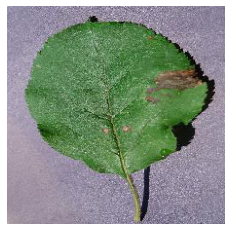

In [36]:
# Old dataset example
image_path = '3b1299be-2602-451f-9877-93edd8bf09a8___JR_FrgE.S 2801.JPG'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale pixel values to the range of [0, 1]

plt.imshow(img[0])
plt.axis('off')
plt.show()

All the data have a grey background

# Retraining New Model Using New Dataset

The new dataset will include all picture with a background that reflect the actual situation on the field. Before retraining new model, we must rerun the preprocessing step above, the generator one.

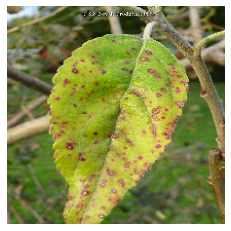

In [37]:
# New dataset example
image_path = 'scab_large.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale pixel values to the range of [0, 1]

plt.imshow(img[0])
plt.axis('off')
plt.show()

In [ ]:
# Load the old model to use it as a base model

import numpy as np
import keras.utils as image
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from tensorflow.keras import Model
from keras.models import load_model
from tensorflow.keras import layers

pre_trained_model2 = load_model('model.h5')

# Freeze the weights of the layers.
for layer in pre_trained_model2.layers:
  layer.trainable = False

In [5]:
# Use mixed10 layer as the last output from the old model

last_layer = pre_trained_model2.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 2048)


In [6]:
# Add a global spatial average pooling layer
x = layers.GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for classification
x = layers.Dense(41, activation='softmax')(x)           

# Append the dense network to the base model
model2 = Model(pre_trained_model2.input, x) 

# Print the model summary. See your dense network connected at the end.
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [8]:
# Compile the new model with Adam Optimizer and decaying learning rate

learning_rate = 0.001
epoch = 30

opt = Adam(learning_rate=learning_rate, decay=learning_rate / epoch)

model2.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"]) 

In [18]:
# Assign a checkpoint callback to save the best model and then train the model

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

checkpoint = ModelCheckpoint('plantcare_model.h5', verbose=1, save_best_only=True)

history2 = model2.fit(train_generator,
                    epochs=epoch,
                    batch_size=BS,
                    validation_data = validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint])

Epoch 1/30
86/86 [==============================] - ETA: 0s - loss: 0.8065 - accuracy: 0.7481
Epoch 1: val_loss improved from inf to 0.66106, saving model to plantcare_model.h5
86/86 [==============================] - 991s 12s/step - loss: 0.8065 - accuracy: 0.7481 - val_loss: 0.6611 - val_accuracy: 0.7866
Epoch 2/30
86/86 [==============================] - ETA: 0s - loss: 0.7275 - accuracy: 0.7726
Epoch 2: val_loss improved from 0.66106 to 0.58898, saving model to plantcare_model.h5
86/86 [==============================] - 993s 12s/step - loss: 0.7275 - accuracy: 0.7726 - val_loss: 0.5890 - val_accuracy: 0.8163
Epoch 3/30
86/86 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.7892
Epoch 3: val_loss did not improve from 0.58898
86/86 [==============================] - 963s 11s/step - loss: 0.6704 - accuracy: 0.7892 - val_loss: 0.5894 - val_accuracy: 0.8136
Epoch 4/30
86/86 [==============================] - ETA: 0s - loss: 0.6637 - accuracy: 0.7901
Epoch 4: val_l

Epoch 29/30
86/86 [==============================] - ETA: 0s - loss: 0.4250 - accuracy: 0.8596
Epoch 29: val_loss did not improve from 0.36129
86/86 [==============================] - 1056s 12s/step - loss: 0.4250 - accuracy: 0.8596 - val_loss: 0.3743 - val_accuracy: 0.8784
Epoch 30/30
86/86 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.8670
Epoch 30: val_loss did not improve from 0.36129
86/86 [==============================] - 1228s 14s/step - loss: 0.4123 - accuracy: 0.8670 - val_loss: 0.3811 - val_accuracy: 0.8748


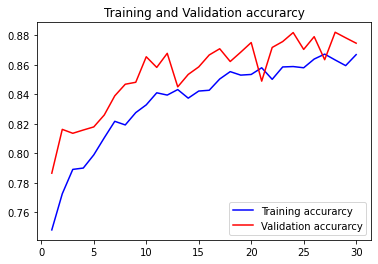

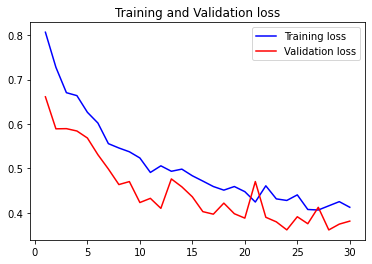

In [38]:
# Plot the accuracy and loss

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

# Predict Testing Using New Model vs Old Model

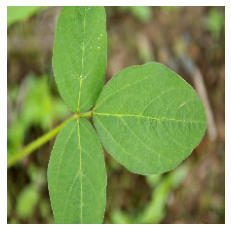

In [39]:
# Soybean___healthy (class 27)
image_path = 'Soybean_leaves.jpg'
img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale pixel values to the range of [0, 1]

plt.imshow(img[0])
plt.axis('off')
plt.show()

In [40]:
#After re-training with new dataset

prediction = model2.predict(img)

predicted_class_index = np.argmax(prediction)

print(predicted_class_index)

1/1 [==============================] - 0s 91ms/step
27


In [24]:
model = load_model('model.h5')

In [41]:
# Old model with old dataset

prediction = model.predict(img)

predicted_class_index = np.argmax(prediction)

print(predicted_class_index)

1/1 [==============================] - 0s 95ms/step
6


# Save Model to SavedModel format

In [33]:
# Load the model from .h5 file
plantcare_model = tf.keras.models.load_model('plantcare_model.h5')

# Convert the model to SavedModel format
tf.saved_model.save(plantcare_model, 'saved_model_plantcare')

INFO:tensorflow:Assets written to: saved_model_plantcare\assets


INFO:tensorflow:Assets written to: saved_model_plantcare\assets
